<a href="https://colab.research.google.com/github/winnie9802/COMP6245/blob/main/LabFive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

442 10


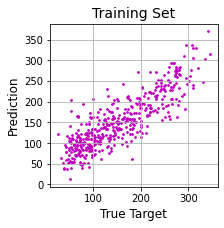

In [ ]:
#原始代码
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes()
X = diabetes.data #数据
y = diabetes.target #标签

def gaussian(x,u,sigma): #对原始数据进行sigma的变换
  return(np.exp(-0.5*np.linalg.norm(x-u)/sigma))

N, p = X.shape
print(N,p)

#Space for design matrix
#
M = 200
U = np.zeros([N,M])
#Basis function locations at random
#
C = np.random.randn(M,p)
#Basis function range as distance between two random data
#
x1 = X[np.floor(np.random.rand()*N).astype(int),:]
x2 = X[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)

#Construct the design matrix
#
for i in range(N):
  for j in range(M):
    U[i,j] = gaussian(X[i,:],C[j,:],sigma)

#Pseudo inverse for linear part
#
#U = np.c_[U,np.ones([N,1])]
l = np.linalg.inv(U.T @ U) @ U.T @ y

#Predicted values on training data
#

yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)
plt.savefig('pic for Q1.jpg')

309 10


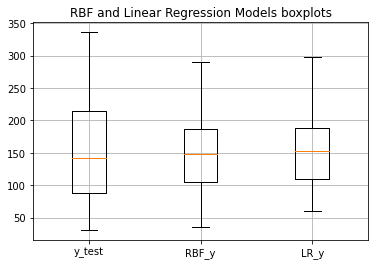

In [ ]:
#第二题代码
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data
X = preprocessing.scale(X) #使对于每个属性/每列来说所有数据都聚集在0附近，方差为1


y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def gaussian(x,u,sigma):
  return(np.exp(-0.5*np.linalg.norm(x-u)/sigma))

N, p = X_train.shape
print(N,p)
MSEset = []
#for M in range(0,300):
  #Space for design matrix
  #
M = 200
U = np.zeros([N,M])
#Basis function locations at random
#为RBF生成中心点
C = np.random.randn(M,p)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=M).fit(X_train)
C = kmeans.cluster_centers_

      #Basis function range as distance between two random data
      #
      # x1 = X[np.floor(np.random.rand()*N).astype(int),:]
      # x2 = X[np.floor(np.random.rand()*N).astype(int),:]
      # sigma = np.linalg.norm(x1-x2)
      #算几对数的平均值

pairnum = 10
singleValue = []
for i in range(pairnum*2):
  singleValue.append(X_train[np.floor(np.random.rand()*N).astype(int),:])

avgSum = 0
for i in range(pairnum):
  avgSum = avgSum + np.linalg.norm(singleValue[i*2]-singleValue[i*2+1])

sigma = avgSum/pairnum

      #Construct the design matrix
      #
for i in range(N):
  for j in range(M):
    U[i,j] = gaussian(X_train[i,:],C[j,:],sigma)
      #预测训练集
      #Pseudo inverse for linear part
      #
      #U = np.c_[U,np.ones([N,1])]
l = np.linalg.inv(U.T @ U) @ U.T @ y_train

      #Predicted values on training data
      #
yh = U @ l
      #预测测试集
N2 = np.size(X_test,0)
U2 = np.zeros([N2,M])
for i in range(N2):
  for j in range(M):
    U2[i,j] = gaussian(X_test[i,:],C[j,:],sigma)
yh_test = U2 @ l
MSE = np.sum(np.square(y_test-yh_test))/N2
MSEset.append(MSE)

# plt.plot(range(0,300),MSEset)
# r = np.where(MSEset == np.max(MSEset))
# r2 = np.where(MSEset == np.min(MSEset))

# plt.text(r[0][0], np.max(MSEset), round(np.max(MSEset)))
# plt.text(r2[0][0], np.min(MSEset), round(np.min(MSEset)))
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
box3 = model.predict(X_test)
box2 = yh_test
plt.figure()
box1 = y_test
plt.boxplot([box1,box2,box3],labels=['y_test','RBF_y','LR_y'])
plt.title("RBF and Linear Regression Models boxplots")
plt.grid(True)
# plt.figure(1)
# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(9,4))
# ax[0].scatter(y_train, yh, c='m', s=3)
# ax[0].grid(True)
# ax[0].set_title("Training Set", fontsize=14)
# ax[0].set_xlabel("True Target", fontsize=12)
# ax[0].set_ylabel("Prediction", fontsize=12)

# ax[1].scatter(y_test, yh_test, c='b', s=3)
# print("MSE:",np.sum(np.square(y_test-yh_test))/N2)
# ax[1].grid(True)
# ax[1].set_title("Test Set", fontsize=14)
# ax[1].set_xlabel("True Target", fontsize=12)
# ax[1].set_ylabel("Prediction", fontsize=12)
# plt.savefig('pic for Q2（正则化后，改变sigma对数，kmeans）.jpg')

In [ ]:
print(r[0][0])
print(r2[0][0])

298
19


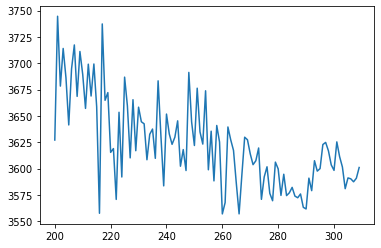

In [ ]:
plt.plot(range(200,310),MSEset)

In [ ]:
#三种方式都加上了的
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data
X = preprocessing.scale(X) #对于每个属性/每列来说所有数据都聚集在0附近，方差为1
y = diabetes.target
from sklearn.model_selection import KFold  
import numpy as np  
#train_index 表示的是训练集的序号，test_index表示的是测试集的序号

kf = KFold(n_splits=10,shuffle=False)  
MSEset = []
for train_index , test_index in kf.split(X):  
  #print('train_index:%s , test_index: %s ' %(train_index,test_index)) 

  X_train = X[train_index, :]
  y_train = y[train_index]
  X_test = X[test_index, :]
  y_test = y[test_index]

  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  def gaussian(x,u,sigma):
    return(np.exp(-0.5*np.linalg.norm(x-u)/sigma))

  N, p = X_train.shape
  print(N,p)

  #Space for design matrix
  #
  M = 200
  U = np.zeros([N,M])
  #Basis function locations at random
  #
  #C = np.random.randn(M,p)
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=M).fit(X_train)
  C = kmeans.cluster_centers_
  #Basis function range as distance between two random data
  #

  #算几对数的平均值
  pairnum = 10
  singleValue = []
  for i in range(pairnum*2):
    singleValue.append(X_train[np.floor(np.random.rand()*N).astype(int),:])

  avgSum = 0
  for i in range(pairnum):
    avgSum = avgSum + np.linalg.norm(singleValue[i*2]-singleValue[i*2+1])


  sigma = avgSum/pairnum

  #Construct the design matrix
  #
  for i in range(N):
    for j in range(M):
      U[i,j] = gaussian(X_train[i,:],C[j,:],sigma)
  #预测训练集
  #Pseudo inverse for linear part
  #
  #U = np.c_[U,np.ones([N,1])]
  l = np.linalg.inv(U.T @ U) @ U.T @ y_train

  #Predicted values on training data
  #
  yh = U @ l
  #预测测试集
  N2 = np.size(X_test,0)
  U2 = np.zeros([N2,M])
  for i in range(N2):
    for j in range(M):
      U2[i,j] = gaussian(X_test[i,:],C[j,:],sigma)
  yh_test = U2 @ l

  # plt.figure(1)
  # fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(9,4))
  # ax[0].scatter(y_train, yh, c='m', s=3)
  # ax[0].grid(True)
  # ax[0].set_title("Training Set", fontsize=14)
  # ax[0].set_xlabel("True Target", fontsize=12)
  # ax[0].set_ylabel("Prediction", fontsize=12)

  # ax[1].scatter(y_test, yh_test, c='b', s=3)
  MSE = np.sum(np.square(y_test-yh_test))/N2
  MSEset.append(MSE)
  print("MSE:", MSE)
  # ax[1].grid(True)
  # ax[1].set_title("Test Set", fontsize=14)
  # ax[1].set_xlabel("True Target", fontsize=12)
  # ax[1].set_ylabel("Prediction", fontsize=12)
  # plt.savefig('pic for Q2.jpg')

print(np.mean(MSEset))
print(np.std(MSEset))

397 10
MSE: 3922.2921779639564
397 10
MSE: 2734.200017813645
398 10
MSE: 3564.34517581504
398 10
MSE: 3227.261652766851
398 10
MSE: 3452.798804342204
398 10
MSE: 3375.4039140961568
398 10
MSE: 4017.4946915350306
398 10
MSE: 2394.3005944051324
398 10
MSE: 4130.155317553404
398 10
MSE: 2193.995369130263
3301.224771542168
637.1074303750947


train_index:[ 3  4  5  6  7  8  9 10 11] , test_index: [0 1 2] 
train_index:[ 0  1  2  6  7  8  9 10 11] , test_index: [3 4 5] 
train_index:[ 0  1  2  3  4  5  8  9 10 11] , test_index: [6 7] 
train_index:[ 0  1  2  3  4  5  6  7 10 11] , test_index: [8 9] 
train_index:[0 1 2 3 4 5 6 7 8 9] , test_index: [10 11] 


309 10


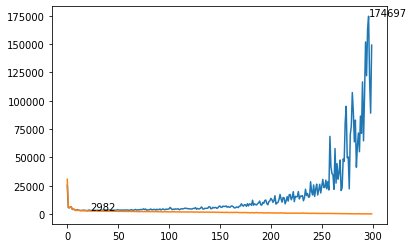

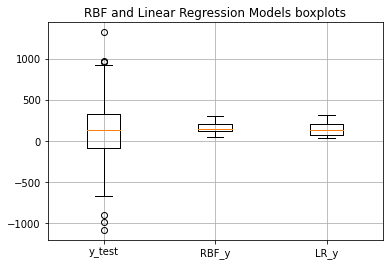

In [ ]:
#第二题代码
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data
X = preprocessing.scale(X) #对于每个属性/每列来说所有数据都聚集在0附近，方差为1


y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def gaussian(x,u,sigma):
  return(np.exp(-0.5*np.linalg.norm(x-u)/sigma))

N, p = X_train.shape
print(N,p)
MSEset = []
MSEset2 = []
for M in range(0,300):
  #Space for design matrix
  #
#M = 200
  U = np.zeros([N,M])
  #Basis function locations at random
  #
  C = np.random.randn(M,p)

  #from sklearn.cluster import KMeans
  #kmeans = KMeans(n_clusters=M).fit(X_train)
  #C = kmeans.cluster_centers_

        #Basis function range as distance between two random data
        #
        # x1 = X[np.floor(np.random.rand()*N).astype(int),:]
        # x2 = X[np.floor(np.random.rand()*N).astype(int),:]
        # sigma = np.linalg.norm(x1-x2)
        #算几对数的平均值

  pairnum = 10
  singleValue = []
  for i in range(pairnum*2):
    singleValue.append(X_train[np.floor(np.random.rand()*N).astype(int),:])

  avgSum = 0
  for i in range(pairnum):
    avgSum = avgSum + np.linalg.norm(singleValue[i*2]-singleValue[i*2+1])
    sigma = avgSum/pairnum

        #Construct the design matrix
        #
  for i in range(N):
    for j in range(M):
      U[i,j] = gaussian(X_train[i,:],C[j,:],sigma)
        #预测训练集
        #Pseudo inverse for linear part
        #
        #U = np.c_[U,np.ones([N,1])]
  l = np.linalg.inv(U.T @ U) @ U.T @ y_train

        #Predicted values on training data
        #
  yh = U @ l
        #预测测试集
  N2 = np.size(X_test,0)
  U2 = np.zeros([N2,M])
  for i in range(N2):
    for j in range(M):
      U2[i,j] = gaussian(X_test[i,:],C[j,:],sigma)
  yh_test = U2 @ l
  MSE = np.sum(np.square(y_test-yh_test))/N2
  MSE2 = np.sum(np.square(y_train-yh))/N
  MSEset.append(MSE)
  MSEset2.append(MSE2)

plt.plot(range(0,300),MSEset)
r = np.where(MSEset == np.max(MSEset))
r2 = np.where(MSEset == np.min(MSEset))

plt.plot(range(0,300),MSEset2)
#r = np.where(MSEset2 == np.max(MSEset2))
#r2 = np.where(MSEset2 == np.min(MSEset2))

plt.text(r[0][0], np.max(MSEset), round(np.max(MSEset)))
plt.text(r2[0][0], np.min(MSEset), round(np.min(MSEset)))
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
box3 = model.predict(X_test)
box2 = yh_test
plt.figure()
box1 = y_test
plt.boxplot([box1,box2,box3],labels=['y_test','RBF_y','LR_y'])
plt.title("RBF and Linear Regression Models boxplots")
plt.grid(True)
# plt.figure(1)
# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(9,4))
# ax[0].scatter(y_train, yh, c='m', s=3)
# ax[0].grid(True)
# ax[0].set_title("Training Set", fontsize=14)
# ax[0].set_xlabel("True Target", fontsize=12)
# ax[0].set_ylabel("Prediction", fontsize=12)

# ax[1].scatter(y_test, yh_test, c='b', s=3)
# print("MSE:",np.sum(np.square(y_test-yh_test))/N2)
# ax[1].grid(True)
# ax[1].set_title("Test Set", fontsize=14)
# ax[1].set_xlabel("True Target", fontsize=12)
# ax[1].set_ylabel("Prediction", fontsize=12)
# plt.savefig('pic for Q2（正则化后，改变sigma对数，kmeans）.jpg')

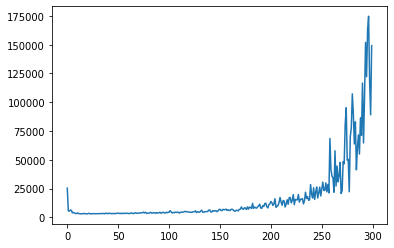

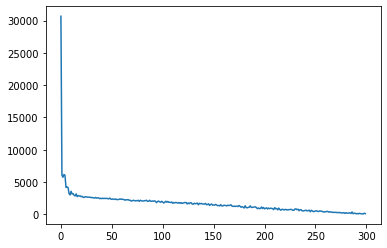

In [ ]:
plt.figure()
plt.plot(range(0,300),MSEset)
plt.figure()
plt.plot(range(0,300),MSEset2)

r = np.where(MSEset == np.max(MSEset))
print()
r2 = np.where(MSEset == np.min(MSEset))